In this project, you will work with a dataset containing information about wine quality and their price. You will use NumPy, Pandas, Matplotlib, and Scikitlearn libraries for data analysis and creating a Regression model for predicting ***price of a wine***.

**Dataset Details:**

*year:* Year

*rating:* Rating

*num_reviews:* Number of reviews

*body:* Richness score of the wine

*acidity:* Acidity Score

*price:* Price


**Datasets Locations and Names:** Canvas -> Modules -> Week 5 -> Datasets -> "wines.csv".

Please save your Googgle Colab project as FirstName_LastName_Project1.ipynb and submit (upload) your source code to Canvas.

# Code


In [1]:
#Importing the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Reding the .csv file
wine = pd.read_csv("wines.csv")

In [2]:
#Display first 5 rows of the dataset
wine.head(5)

,year,rating,num_reviews,body,acidity,price
0,2013.0,4.9,58,5.0,3.0,995.00
1,2018.0,4.9,31,4.0,2.0,313.50
2,2009.0,4.8,1793,5.0,3.0,324.95
3,1999.0,4.8,1705,5.0,3.0,692.96
4,1996.0,4.8,1309,5.0,3.0,778.06


In [3]:
#Display the datatype, number of non-null values along with memory usage
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         7210 non-null   float64
 1   rating       7500 non-null   float64
 2   num_reviews  7500 non-null   int64  
 3   body         6331 non-null   float64
 4   acidity      6331 non-null   float64
 5   price        7500 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 351.7 KB


In [4]:
#Understanding the statistics of the dataset
wine.describe()

,year,rating,num_reviews,body,acidity,price
count,7210.000000,7500.000000,7500.000000,6331.000000,6331.000000,7500.000000
mean,2013.495839,4.254933,451.109067,4.158427,2.946612,60.095822
std,6.940450,0.118029,723.001856,0.583352,0.248202,150.356676
min,1910.000000,4.200000,25.000000,2.000000,1.000000,4.990000
25%,2011.000000,4.200000,389.000000,4.000000,3.000000,18.900000
50%,2015.000000,4.200000,404.000000,4.000000,3.000000,28.530000
75%,2017.000000,4.200000,415.000000,5.000000,3.000000,51.350000
max,2021.000000,4.900000,32624.000000,5.000000,3.000000,3119.080000


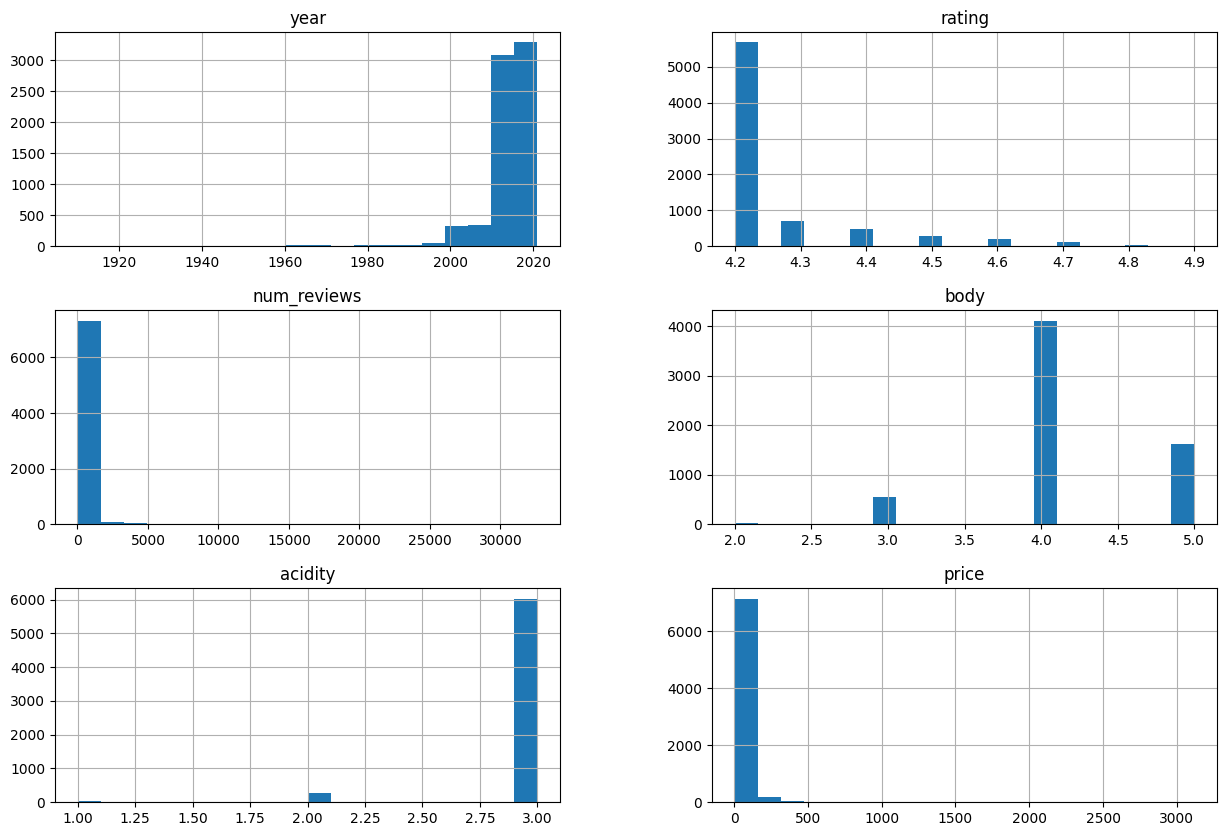

In [5]:
#Histogram
wine.hist(bins=20, figsize=(15, 10))
plt.show()

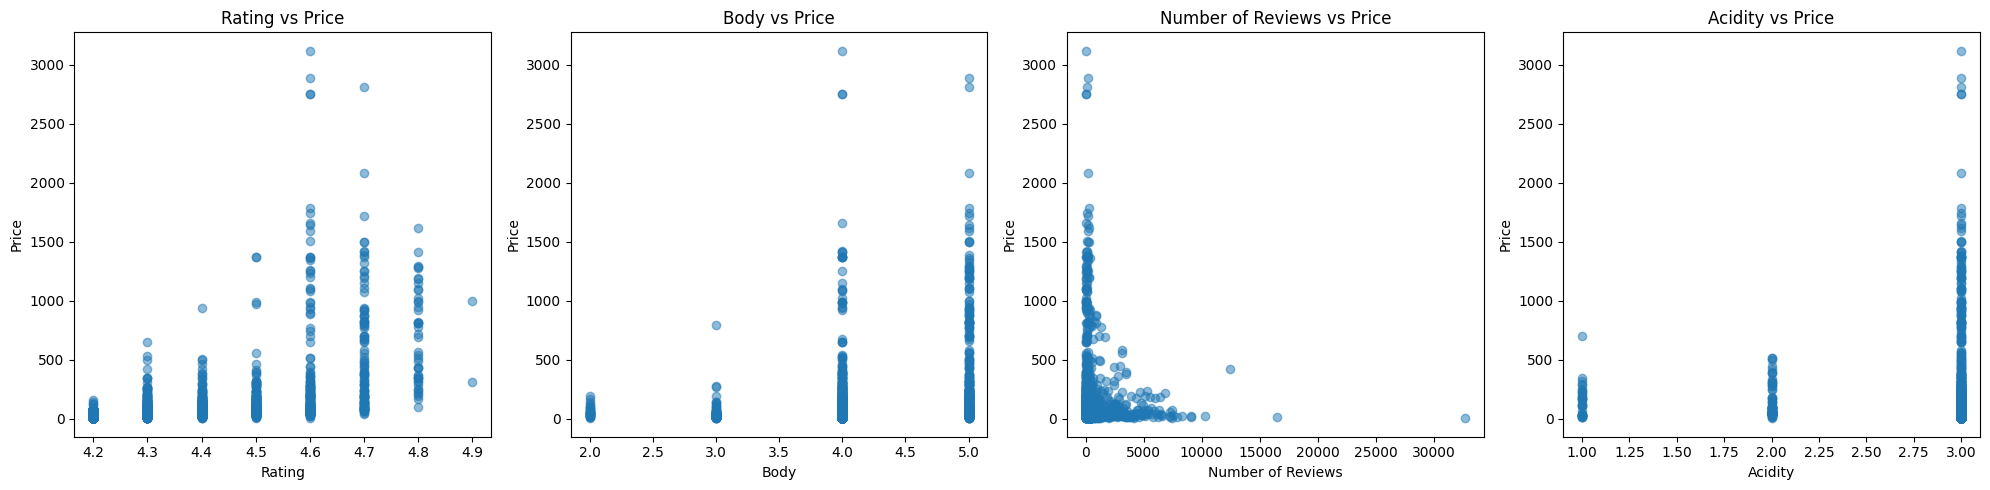

In [6]:
# Explore the relationships between features and the target variable
plt.figure(figsize=(20, 5))

# Scatter plot for Rating vs Price
plt.subplot(1, 4, 1)
plt.scatter(wine['rating'], wine['price'],alpha=0.5)
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Rating vs Price')

# Scatter plot for Body vs Price
plt.subplot(1, 4, 2)
plt.scatter(wine['body'], wine['price'],alpha=0.5)
plt.xlabel('Body')
plt.ylabel('Price')
plt.title('Body vs Price')

# Scatter plot for Number of Reviews vs Price
plt.subplot(1, 4, 3)
plt.scatter(wine['num_reviews'], wine['price'],alpha=0.5)
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Number of Reviews vs Price')

# Scatter plot for Acidity vs Price
plt.subplot(1, 4, 4)
plt.scatter(wine['acidity'], wine['price'],alpha=0.5)
plt.xlabel('Acidity')
plt.ylabel('Price')
plt.title('Acidity vs Price')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

In [7]:
# Preprocessing
# Check for missing values
print(wine.isnull().sum())

year            290
rating            0
num_reviews       0
body           1169
acidity        1169
price             0
dtype: int64


price          1.000000
rating         0.544809
body           0.153624
num_reviews   -0.030083
acidity       -0.032870
year          -0.388384
Name: price, dtype: float64


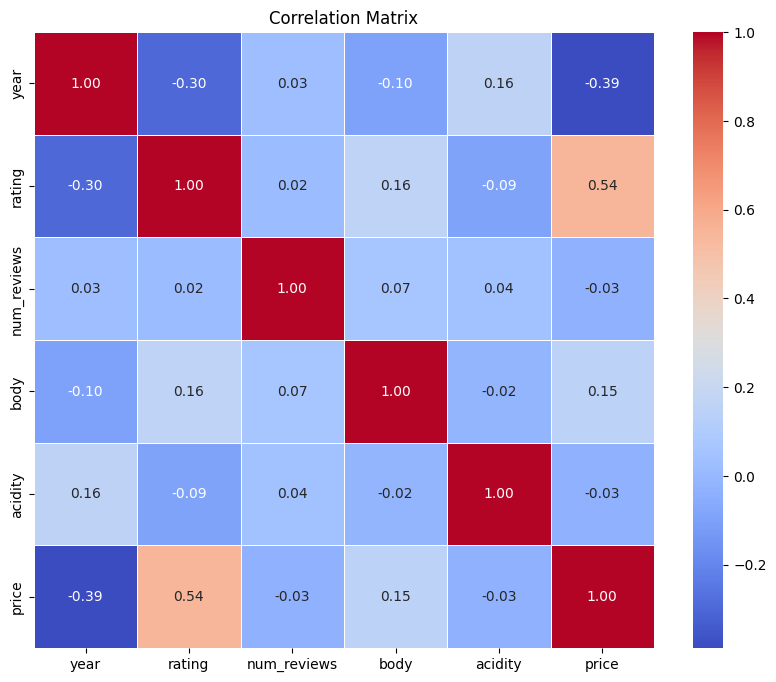

In [8]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = wine.corr()
# Calculate the correlation between "price" and other features
price_corr = corr_matrix["price"].sort_values(ascending=False)

# Print the sorted correlation coefficients
print(price_corr)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

**There is moderate correlation between 'price' and 'rating'.**

In [9]:
#Creating ratios between features that have significant correlations

wine["rating_per_body"] = wine["rating"] / wine["body"]
wine["rating_per_year"] = wine["rating"] / wine["year"]
wine["rating_per_reviews"] = wine["rating"] / wine["num_reviews"]

In [10]:
#Calculate the correlation matrix including the new columns
corr_matrix_with_ratios = wine.corr()

#Extract correlation values for "price" with the new features
correlation_with_ratios = corr_matrix_with_ratios["price"][["rating_per_body", "rating_per_year", "rating_per_reviews"]]
print(correlation_with_ratios)

rating_per_body      -0.040982
rating_per_year       0.569338
rating_per_reviews    0.217459
Name: price, dtype: float64


In [11]:
#Comparing price with the new features

#Selecting relevant columns for correlation matrix
selected_columns = ["price", "rating_per_body", "rating_per_year", "rating_per_reviews"]

#Calculating correlation matrix
corr_matrix_new_features = wine[selected_columns].corr()

#Print the correlation matrix
print(corr_matrix_new_features)


                       price  rating_per_body  rating_per_year  \
price               1.000000        -0.040982         0.569338   
rating_per_body    -0.040982         1.000000         0.049214   
rating_per_year     0.569338         0.049214         1.000000   
rating_per_reviews  0.217459         0.133289         0.516622   

                    rating_per_reviews  
price                         0.217459  
rating_per_body               0.133289  
rating_per_year               0.516622  
rating_per_reviews            1.000000  


In [12]:
#Drop the "rating_per_body" feature
wine.drop("rating_per_body", axis=1, inplace=True)

**Splitting the Wine Dataset**

In [13]:
#Separate features (X) and target variable (y)
X = wine.drop(columns=['price'])  # Features
y = wine['price']  # Target variable

In [14]:
from sklearn.model_selection import train_test_split

#Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#Display the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (6000, 7)
Testing set shape: (1500, 7)


In [16]:
#List of numerical features that will be standardized
num_std_attributes = ['year', 'rating', 'num_reviews', 'body', 'acidity','rating_per_year', 'rating_per_reviews']

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#Define preprocessing steps for numerical features
numeric_std_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                                  ('stdscaler', StandardScaler())])

In [18]:
from sklearn.compose import ColumnTransformer

#Combine preprocessing steps for numerical features using ColumnTransformer
full_transformer = ColumnTransformer([('numeric_stdpreprocessing', numeric_std_pipeline, num_std_attributes)])

In [19]:
from sklearn.linear_model import LinearRegression

p1_full_pipeline = Pipeline([('all_column_transformation', full_transformer),
                        ('linear_regression', LinearRegression())
                      ])

In [20]:
#For regression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

def fit_and_print(p, train_set, train_labels, test_set, test_labels):
  p.fit(train_set, train_labels)
  train_preds = p.predict(train_set)
  test_preds = p.predict(test_set)
  print("Training Error MAE: " + str(mean_absolute_error(train_preds, train_labels)))
  print("Test Error MAE: " + str(mean_absolute_error(test_preds, test_labels)))
  print("R2 score: " + str(r2_score(test_preds, test_labels)))

In [21]:
# Fit the model
fit_and_print(p1_full_pipeline, X_train, y_train, X_test, y_test)

Training Error MAE: 40.55878143626853
Test Error MAE: 45.67343793095568
R2 score: -1.0078658681345036


**Polynomial Regression**

In [22]:
from sklearn.preprocessing import PolynomialFeatures

#Polynomial Features
poly_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                          ('poly_features', PolynomialFeatures(degree=2, include_bias=False))
                          ])

In [23]:
from sklearn.compose import ColumnTransformer

full_transformer_poly = ColumnTransformer([ ('poly_features', poly_pipeline, num_std_attributes),
                                            ('numeric_stdpreprocessing', numeric_std_pipeline, num_std_attributes)])

In [24]:
from sklearn.linear_model import LinearRegression

p2_full_pipeline = Pipeline([('all_column_transformation_poly', full_transformer_poly),
                        ('linear_regression', LinearRegression())
                      ])

p2_full_pipeline

Pipeline(steps=[('all_column_transformation_poly',
                 ColumnTransformer(transformers=[('poly_features',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly_features',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['year', 'rating',
                                                   'num_reviews', 'body',
                                                   'acidity', 'rating_per_year',
                                                   'rating_per_reviews']),
                                                 ('numeric_stdpreprocessing',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('stdscaler',
                                                                   StandardScaler())]),
                                                  ['year', 'rating',
                                                   'num_reviews', 'body',
                                                   'acidity', 'rating_per_year',
                                                   'rating_per_reviews'])])),
                ('linear_regression', LinearRegression())])

In [25]:
fit_and_print(p2_full_pipeline, X_train, y_train, X_test, y_test)

Training Error MAE: 30.363119311877924
Test Error MAE: 34.37138432821331
R2 score: -0.15185504477109646


In [26]:
# Polynomial Features with degree 3
poly_pipeline_degree_3 = Pipeline([('imputer', SimpleImputer(strategy='median')),
                                   ('poly_features', PolynomialFeatures(degree=3, include_bias=False))
                                  ])

# ColumnTransformer with polynomial features of degree 3 and standard preprocessing
full_transformer_poly_degree_3 = ColumnTransformer([('poly_features_degree_3', poly_pipeline_degree_3, num_std_attributes),
                                                     ('numeric_stdpreprocessing', numeric_std_pipeline, num_std_attributes)
                                                    ])

# Pipeline with polynomial features of degree 3 and linear regression
p3_full_pipeline = Pipeline([('all_column_transformation_poly_degree_3', full_transformer_poly_degree_3),
                             ('linear_regression', LinearRegression())
                            ])

# Fit and print the results
fit_and_print(p3_full_pipeline, X_train, y_train, X_test, y_test)

Training Error MAE: 79.4955596920193
Test Error MAE: 97.20731708761265
R2 score: -0.09060375491228023


**Decision Tree**

In [27]:
from sklearn.tree import DecisionTreeRegressor

p4_full_pipeline = Pipeline([('all_column_transformation', full_transformer),
                        ('decision_regression', DecisionTreeRegressor())
                      ])

fit_and_print(p4_full_pipeline, X_train, y_train, X_test, y_test)

Training Error MAE: 0.7862454260861442
Test Error MAE: 28.318596214826705
R2 score: -0.06938200620928292


**Support Vector Machine**

In [28]:
from sklearn.svm import SVR

p5_full_pipeline = Pipeline([
    ('all_column_transformation', full_transformer),
    ('svm_regression', SVR(kernel='rbf'))
])

fit_and_print(p5_full_pipeline, X_train, y_train, X_test, y_test)


Training Error MAE: 29.604869464889145
Test Error MAE: 35.568114110267146
R2 score: -55.48142951486805


**Stochastic Gradient Descent**

In [29]:
from sklearn.linear_model import SGDRegressor

p6_full_pipeline = Pipeline([('all_column_transformation', full_transformer),
                        ('SGD_regression', SGDRegressor(penalty=None))
                      ])

fit_and_print(p6_full_pipeline, X_train, y_train, X_test, y_test)

Training Error MAE: 41.69604313334996
Test Error MAE: 46.70186012931948
R2 score: -0.8702819280804681


**Ridge Regression**

In [30]:
p7_full_pipeline = Pipeline([('all_column_transformation', full_transformer),
                        ('SGD_regression', SGDRegressor(penalty='l2', eta0=0.1))
                      ])

fit_and_print(p7_full_pipeline, X_train, y_train, X_test, y_test)

Training Error MAE: 44.02563330503267
Test Error MAE: 50.02810091196396
R2 score: -1.1623679032969676


**Lasso Regression**

In [31]:
p8_full_pipeline = Pipeline([('all_column_transformation', full_transformer),
                        ('SGD_regression', SGDRegressor(penalty='l1'))
                      ])

fit_and_print(p8_full_pipeline, X_train, y_train, X_test, y_test)

Training Error MAE: 42.883596151160326
Test Error MAE: 47.77486344120096
R2 score: -0.8044236820435264


**Random Forest**

In [32]:
from sklearn.ensemble import RandomForestRegressor

p9_full_pipeline = Pipeline([('all_column_transformation', full_transformer),
                          ('RF_regression', RandomForestRegressor())
                          ])

fit_and_print(p9_full_pipeline, X_train, y_train, X_test, y_test)

Training Error MAE: 8.459528454792316
Test Error MAE: 24.276054566446664
R2 score: 0.09828398117088255


**The best model is Random Forest**

In [33]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = [
              {'RF_regression__n_estimators': [10, 50, 100],
              'RF_regression__max_depth': [5, 10, 20],
              'RF_regression__min_samples_split': [2, 4, 6],
              'RF_regression__min_samples_leaf': [1, 2, 4]}
            ]

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=p9_full_pipeline, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

In [34]:
# Perform the grid search
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('all_column_transformation',
                                        ColumnTransformer(transformers=[('numeric_stdpreprocessing',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('stdscaler',
                                                                                          StandardScaler())]),
                                                                         ['year',
                                                                          'rating',
                                                                          'num_reviews',
                                                                          'body',
                                                                          'acidity',
                                                                          'rating_per_year',
                                                                          'rating_per_reviews'])])),
                                       ('RF_regression',
                                        RandomForestRegressor())]),
             param_grid=[{'RF_regression__max_depth': [5, 10, 20],
                          'RF_regression__min_samples_leaf': [1, 2, 4],
                          'RF_regression__min_samples_split': [2, 4, 6],
                          'RF_regression__n_estimators': [10, 50, 100]}],
             scoring='neg_mean_squared_error')

In [35]:
# Best parameters found
print("Best parameters found:")
print(grid_search.best_params_)

Best parameters found:
{'RF_regression__max_depth': 10, 'RF_regression__min_samples_leaf': 2, 'RF_regression__min_samples_split': 2, 'RF_regression__n_estimators': 50}


In [36]:
p10_full_pipeline = Pipeline([('all_column_transformation', full_transformer),
                          ('RF_regression', RandomForestRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=8, n_estimators=50))
                          ])

fit_and_print(p10_full_pipeline, X_train, y_train, X_test, y_test)

Training Error MAE: 17.26466142806263
Test Error MAE: 25.120005682111554
R2 score: 0.015474705179706505
